In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


df.head() will give us the details fo top 5 rows of every cooloumn. We can use df.tail() to get the last 5 rows and similiary df.head(10) to get top 10 rows.

The data is about cars and we need to predict the price of car using the above data

We will be using Decision Tree to get the price of the car.

In [3]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

dtypes gives the data type of coloumn

In [4]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In the above dataframe all the coloumns are not numeric. So we will consider only those coloumn whose values are in numeric and will make all numeric to float.

In [5]:
df.dtypes
for x in df:
    if df[x].dtypes == "int64":
        df[x] = df[x].astype(float)
        print (df[x].dtypes)

float64
float64
float64
float64
float64
float64
float64
float64


Preparing the Data As with the classification task, in this section we will divide our data into attributes and labels and consequently into training and test sets. We will create 2 data set,one for price while the other (df-price). Since pur dataframe has many data in object format, for this analysis we are removing all the coloumn with object type and for all NaN value we are removig that row

In [6]:
df = df.select_dtypes(exclude=['object'])
df=df.fillna(df.mean())
X = df.drop('price',axis=1)
y = df['price']

Here the X variable contains all the columns from the dataset, except 'Price' column, which is the label. The y variable contains values from the 'Price' column, which means that the X variable contains the attribute set and y variable contains the corresponding labels.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training SVM

In [22]:
from sklearn.svm import SVR

We will create an object svr using the impo function SVM.We will use the kernel as linear.

In [23]:
svr = SVR(kernel = 'linear',C = 1000)

in order to work in an efficient manner we will standardize our data.SVM works on distance of points so its necessary that all our data should be of same standard.

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc= StandardScaler().fit(X_train)

In [26]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_test_std

array([[ 0.17453157, -0.7473421 , -0.70428107, -1.4995245 , -1.05619832,
        -0.67877552, -1.30249126, -0.87278899, -1.15396095, -0.47648372,
        -0.09140157, -0.90774727,  0.59090608,  2.00340082,  1.79022864,
        -1.50033307, -0.29738086,  0.29738086],
       [-1.42118568, -1.74885637,  0.63398001,  0.14076744,  0.30739662,
         0.50614488, -0.1142863 , -0.38613195, -0.24348674,  0.32881569,
         3.4734668 , -0.82496629, -1.30634872,  0.73955013,  0.31375141,
        -0.82735207,  3.36269123, -3.36269123],
       [-0.62332705, -0.01896807,  2.63290164,  2.08080815,  1.2007864 ,
         2.05879919,  1.74841125,  0.63584784,  1.38777956,  0.89923611,
         3.05894722, -0.2179058 , -2.04417004, -0.05035655, -0.86743037,
        -0.18802012,  3.36269123, -3.36269123],
       [-0.62332705,  0.16312543,  0.29517974,  0.64867509,  0.30739662,
         0.58786352,  1.09156527,  1.34150055,  0.36349607,  0.06038255,
        -0.2572094 ,  1.35493275,  0.16929391, -1.314

Now our data has been standarised.

In [27]:
svr.fit(X_train_std,y_train)
y_test_pred = svr.predict(X_test_std)


In [28]:
y_train_pred = svr.predict(X_train_std)

lets check our predicted values

In [29]:
y_test_pred

array([ 5957.14966842, 14468.92070095, 20448.68298715, 21478.92571603,
       20124.68107731,  9079.70352739, 15827.33391626,  6005.66841863,
       16069.42347072,  7254.92359917,  9776.48212662, 20670.10877046,
       12433.67581456, 11143.00652033, 13539.9142024 , 19226.71716277,
        6548.30452181, 20166.24495046,  8818.8454487 ,  6470.62142339,
       12170.16325257, 10461.81392719, 30525.17977575,  6766.09198268,
       13432.63305394, 20616.74081099,  8883.9869784 ,  8581.12259715,
       14982.54291298, 30430.16956057, 28911.77849742, 13980.97058004,
        7824.82285653, 20515.39293649,  8003.99866007, 11357.89548277,
       13718.79721617, 16467.89155357,  9304.60919156, 18705.27852977,
        6421.02399024])

Time to check modal performance

In [32]:
from sklearn import metrics

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Squared Error: 21156303.382349975
Root Mean Squared Error: 4599.598176183435


In [35]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.8510467833352241

In [36]:
r2_score(y_test,y_test_pred)

0.720783662521954

Our R sqrt score for test data is 0.72 and for train data is 0.85 which is a good value.

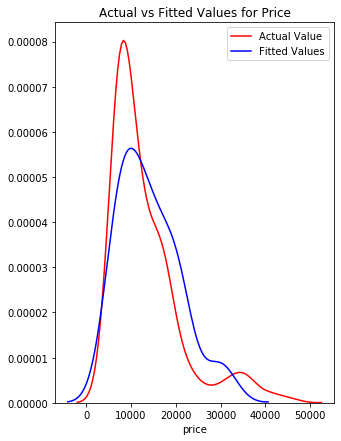

In [39]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

The above is the graph between the actual and predicted values